<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ" data-toc-modified-id="Анализ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Пропуски,-дубликаты" data-toc-modified-id="Пропуски,-дубликаты-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Пропуски, дубликаты</a></span></li><li><span><a href="#Выбросы" data-toc-modified-id="Выбросы-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Выбросы</a></span></li></ul></li><li><span><a href="#Оценка-категориальных-признаков" data-toc-modified-id="Оценка-категориальных-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Оценка категориальных признаков</a></span></li><li><span><a href="#Удаление-признаков" data-toc-modified-id="Удаление-признаков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Удаление признаков</a></span></li><li><span><a href="#Кодирование-категориальных-признаков" data-toc-modified-id="Кодирование-категориальных-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кодирование категориальных признаков</a></span></li><li><span><a href="#Разделение-выборок" data-toc-modified-id="Разделение-выборок-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Разделение выборок</a></span></li><li><span><a href="#Выбор-количества-признаков" data-toc-modified-id="Выбор-количества-признаков-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выбор количества признаков</a></span></li><li><span><a href="#Приложение" data-toc-modified-id="Приложение-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Приложение</a></span></li></ul></div>

In [3]:
!pip install dash

In [4]:
!pip install catboost

In [5]:
!pip install jupyter-dash

In [6]:
!pip install dash_core_components
!pip install dash_html_components 

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_log_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
from catboost import CatBoostRegressor

In [8]:
#df=pd.read_csv(r'train_sb.csv', sep=',')
df=pd.read_csv(r'train.csv', sep=',')
pd.set_option('display.max_columns', None)

## Анализ

In [9]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [10]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 292 columns):
 #    Column                                 Non-Null Count  Dtype  
---   ------                                 --------------  -----  
 0    id                                     30471 non-null  int64  
 1    timestamp                              30471 non-null  object 
 2    full_sq                                30471 non-null  int64  
 3    life_sq                                24088 non-null  float64
 4    floor                                  30304 non-null  float64
 5    max_floor                              20899 non-null  float64
 6    material                               20899 non-null  float64
 7    build_year                             16866 non-null  float64
 8    num_room                               20899 non-null  float64
 9    kitch_sq                               20899 non-null  float64
 10   state                                  16912 non-null  f

In [11]:
#загрузка обучающего df
train = pd.read_csv('train.csv', index_col=0, parse_dates=['timestamp'], encoding='utf-8')

In [12]:
#загрузка тестового df
test = pd.read_csv('test.csv', parse_dates=['timestamp'], encoding='utf-8')

In [13]:
train.shape

(30471, 291)

In [14]:
test.shape

(7662, 291)

In [15]:
train.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,c

In [16]:
test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30471 entries, 1 to 30473
Columns: 291 entries, timestamp to price_doc
dtypes: datetime64[ns](1), float64(119), int64(156), object(15)
memory usage: 67.9+ MB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Columns: 291 entries, id to market_count_5000
dtypes: datetime64[ns](1), float64(116), int64(159), object(15)
memory usage: 17.0+ MB


In [19]:
#Посмотрим на количество пропусков в данных
pd.isnull(train[train.columns[train.isnull().any()].tolist()]).sum().sort_values(ascending=False)

hospital_beds_raion                      14441
build_year                               13605
state                                    13559
cafe_sum_500_max_price_avg               13281
cafe_sum_500_min_price_avg               13281
cafe_avg_price_500                       13281
max_floor                                 9572
material                                  9572
num_room                                  9572
kitch_sq                                  9572
preschool_quota                           6688
school_quota                              6685
cafe_avg_price_1000                       6524
cafe_sum_1000_max_price_avg               6524
cafe_sum_1000_min_price_avg               6524
life_sq                                   6383
raion_build_count_with_builddate_info     4991
build_count_after_1995                    4991
build_count_1946-1970                     4991
build_count_1921-1945                     4991
build_count_before_1920                   4991
build_count_1

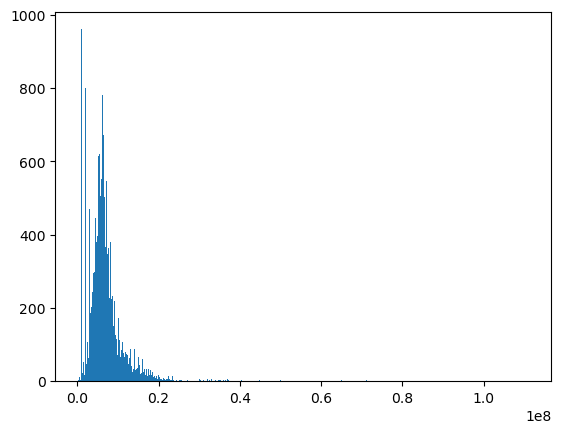

In [20]:
#Распределиение целевой переменной 
plt.hist(df['price_doc'], bins = 1000)
plt.show()

In [21]:
# Сравним зависимость целевой переменной с другими параметрами 

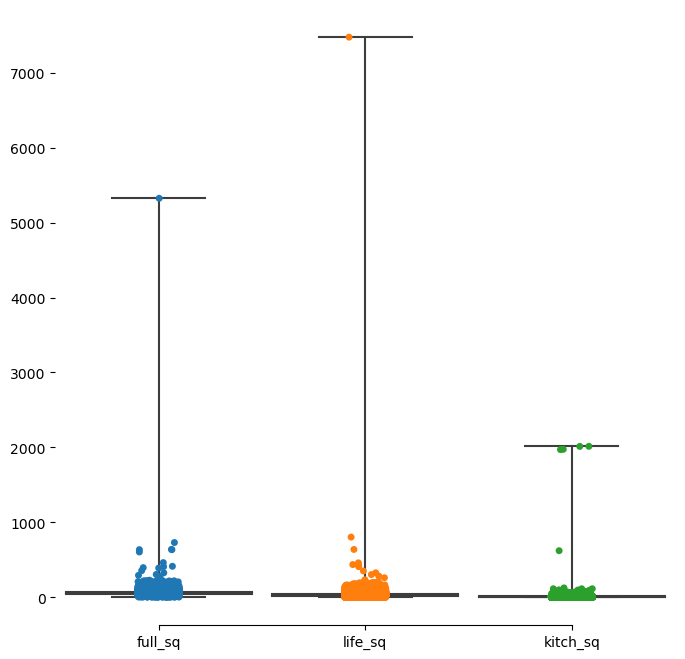

In [22]:
#Зависимость цены от площади комнат в квартире
f, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data=train[['full_sq','life_sq','kitch_sq']],whis=[0, 100], width=.9)
sns.stripplot(data=train[['full_sq','life_sq','kitch_sq']])
sns.despine(trim=True, left=True)

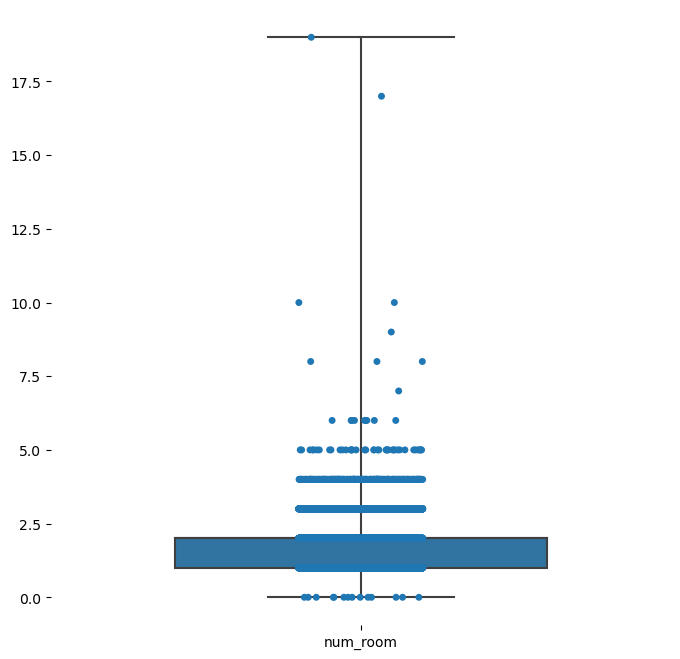

In [23]:
#Зависимость цены от количества комнат
f, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data=train[['num_room']],whis=[0, 100], width=.6)
sns.stripplot(data=train[['num_room']])
sns.despine(trim=True, left=True)

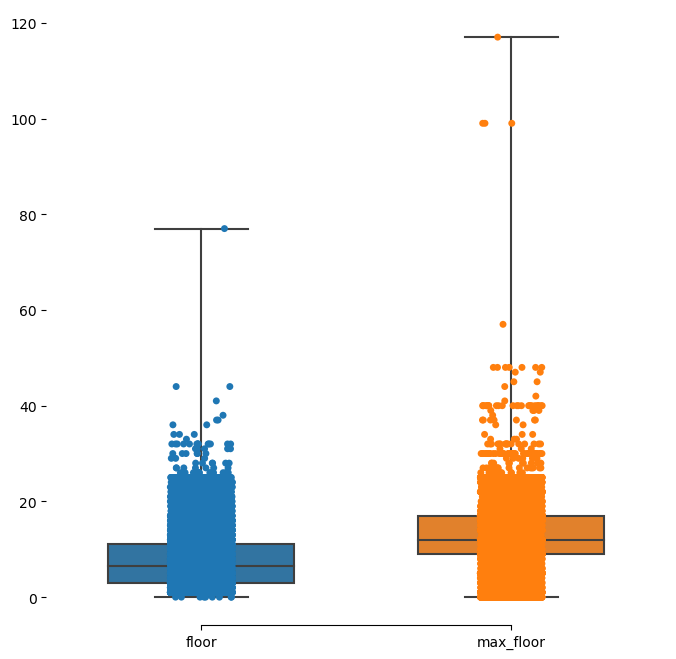

In [24]:
#Зависимость цены от этажа
f, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data=train[['floor','max_floor']],whis=[0, 100], width=.6)
sns.stripplot(data=train[['floor','max_floor']])
sns.despine(trim=True, left=True)

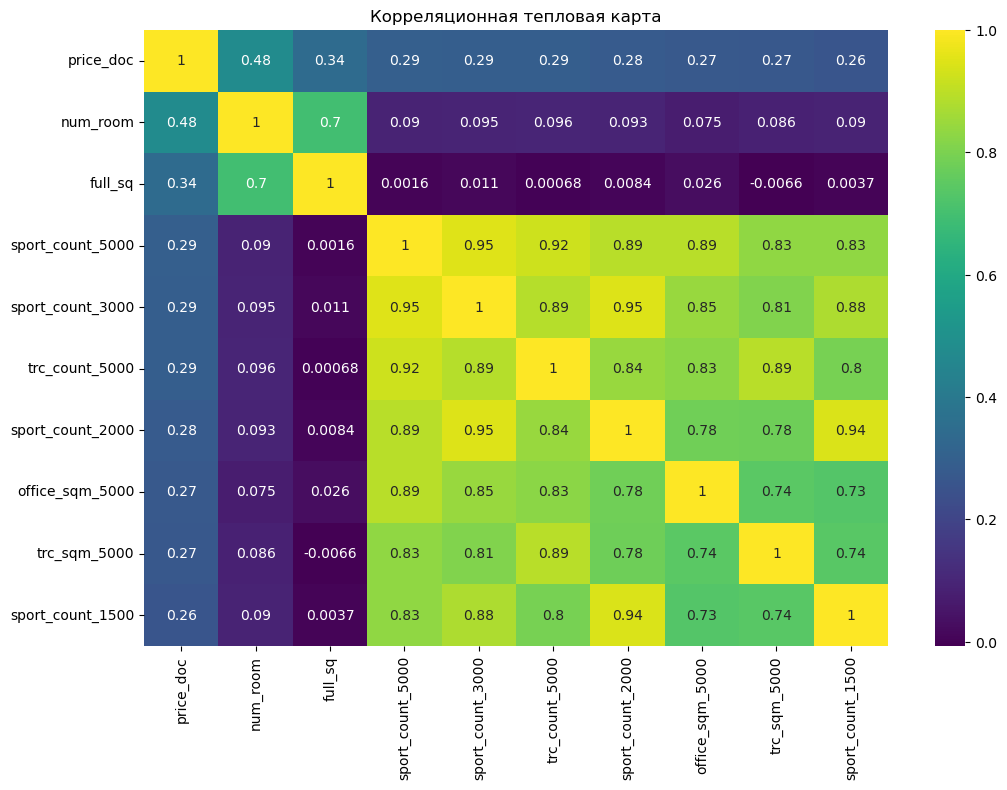

In [25]:
# Вычислим корреляционную матрицу
corr_matrix = train.corr()

# Выберем наиболее коррелирующие характеристики с price_doc
top_correlated_features = corr_matrix.nlargest(10, 'price_doc')['price_doc'].index

# Построим тепловую карту корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(train[top_correlated_features].corr(), annot=True, cmap='viridis')
plt.title("Корреляционная тепловая карта")
plt.show()

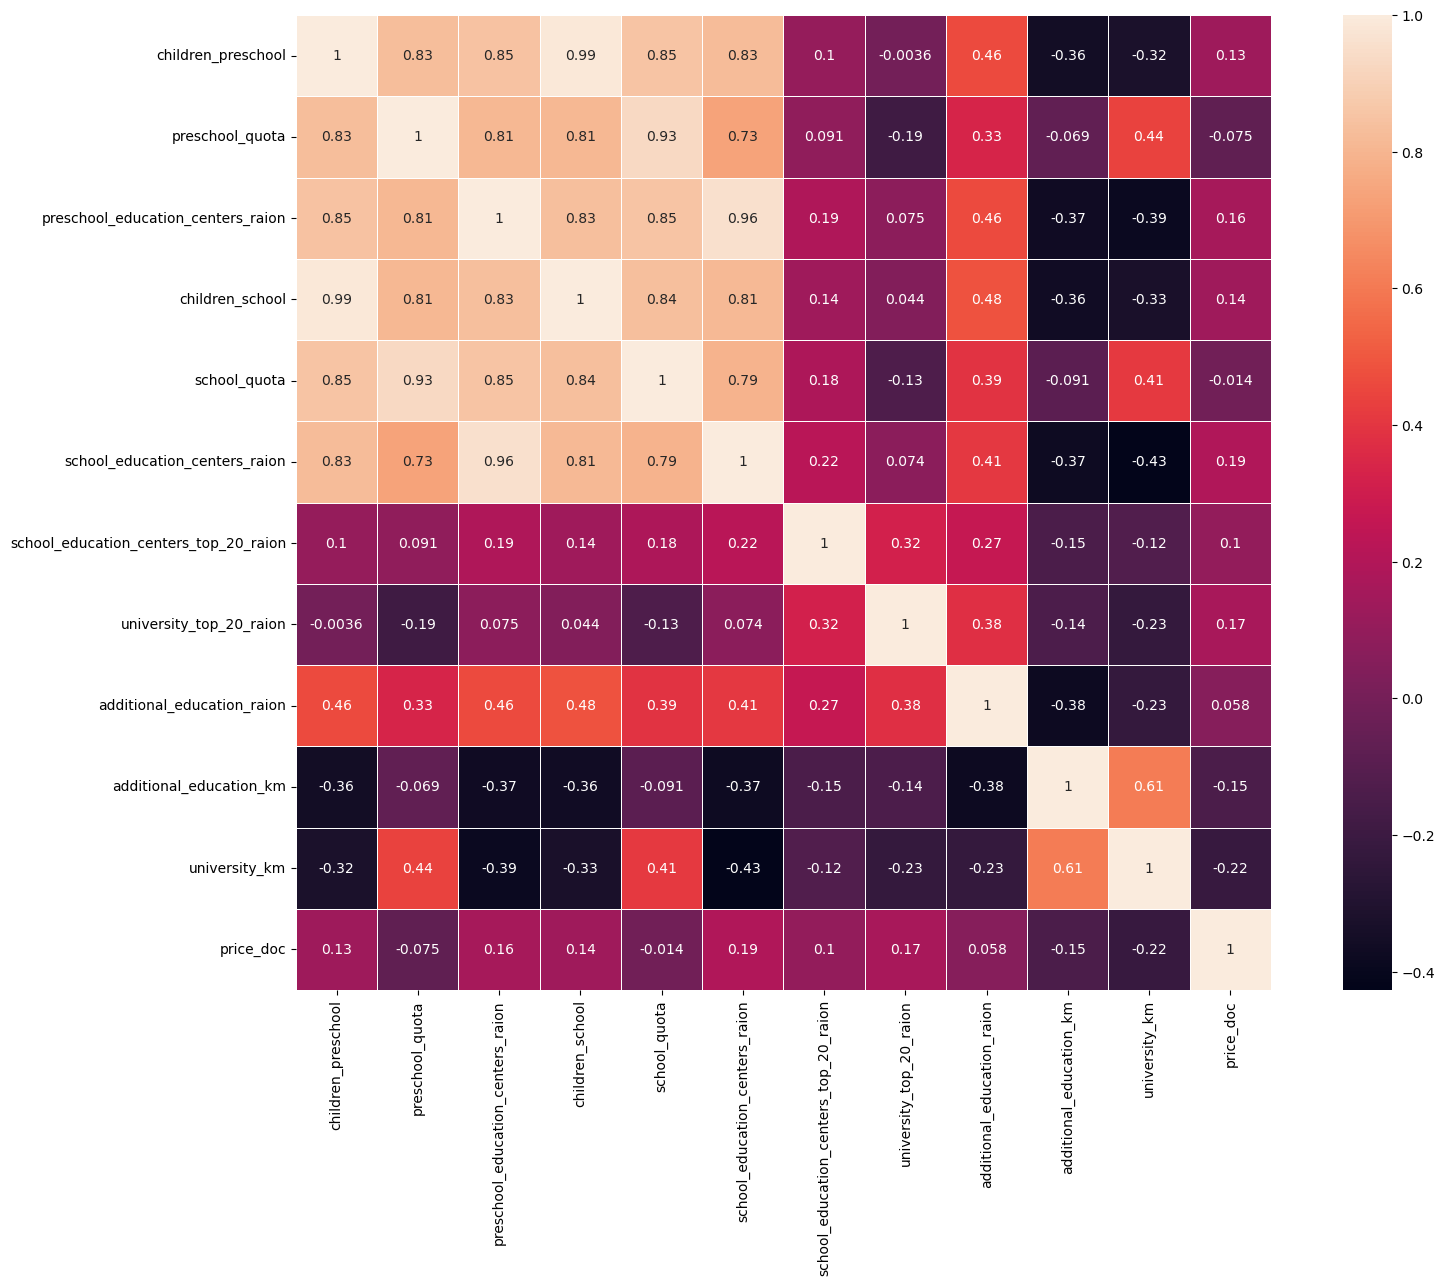

In [26]:
#Посмотрим на корреляцию цены от наличия в районе образовательных учреждений
sp_obj = ['children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 
          'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 
           'university_top_20_raion', 'additional_education_raion', 'additional_education_km', 
          'university_km', 'price_doc']


matrcorr = train[sp_obj].corr()

plt.subplots(figsize=(18, 15))
sns.heatmap(matrcorr, square=True, linewidths=.5, annot=True)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.subplots_adjust(top = 0.95, bottom = 0.3, left = 0.2, right = 1)
plt.show()

In [27]:
#Наибольшее предпочтение отдается школьным образовательным центрам

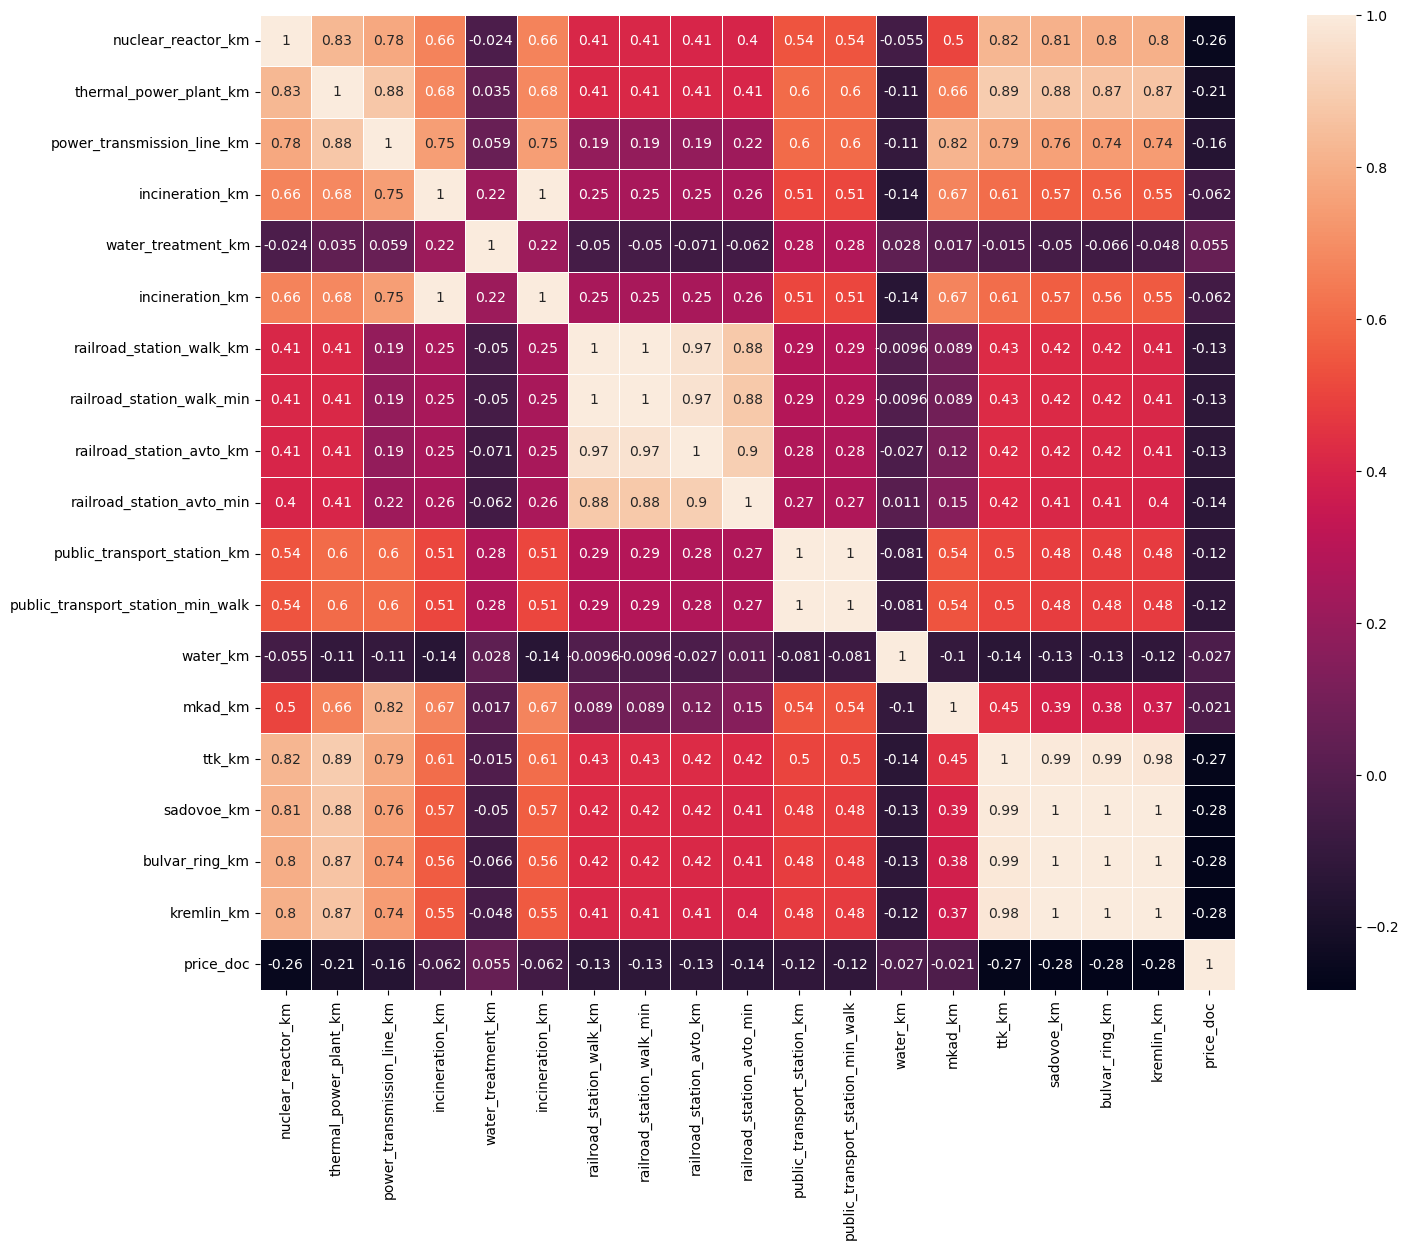

In [28]:
#Посмотрим на корреляцию цены от наличия в районе различной инфраструктуры
sp_obj = ['nuclear_reactor_km', 'thermal_power_plant_km', 'power_transmission_line_km', 'incineration_km',
                'water_treatment_km', 'incineration_km', 'railroad_station_walk_km', 'railroad_station_walk_min', 
                'railroad_station_avto_km', 'railroad_station_avto_min', 'public_transport_station_km', 
                'public_transport_station_min_walk', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km','bulvar_ring_km',
                'kremlin_km', 'price_doc']

matrcorr = train[sp_obj].corr()

plt.subplots(figsize=(18, 15))
sns.heatmap(matrcorr, square=True, linewidths=.5, annot=True)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.subplots_adjust(top = 0.95, bottom = 0.3, left = 0.2, right = 1)
plt.show()

In [29]:
#Цена на квартиру в даннму случает играет расстояние до водоочистных сооружений. Чем дальше квартира находится от водоочистных сооружений,
#тем она дороже

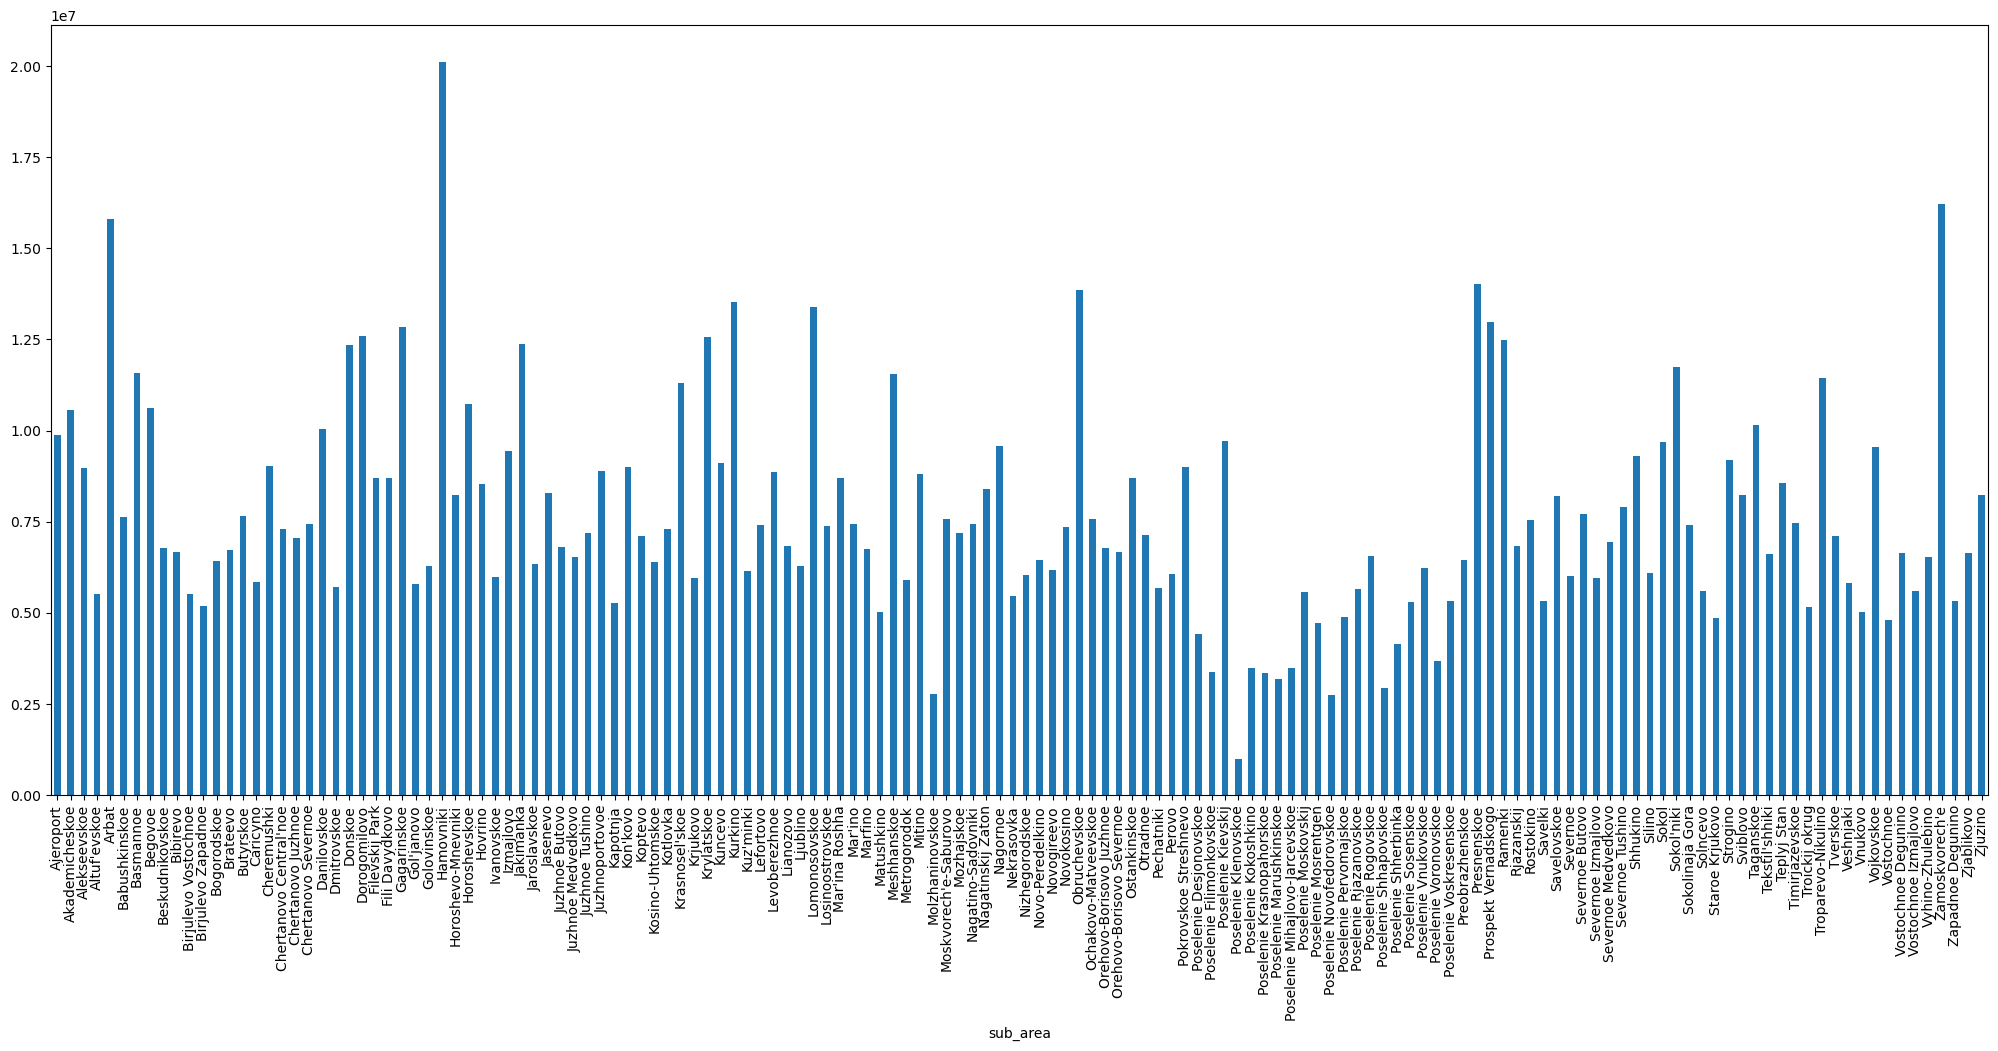

In [30]:
#Посмотрим в каком районе самая высокая средняя цена продажи.
plt.figure(figsize=(25,10))
train.price_doc.groupby(train.sub_area).mean().plot.bar()
plt.show()

In [31]:
#Исходя из построенной гистограммы, видно что,
#самая высокая средняя цена в Хамовниках, а самая низкая средняя цена - поселение Кленовское

In [32]:
train.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,c

In [33]:
test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

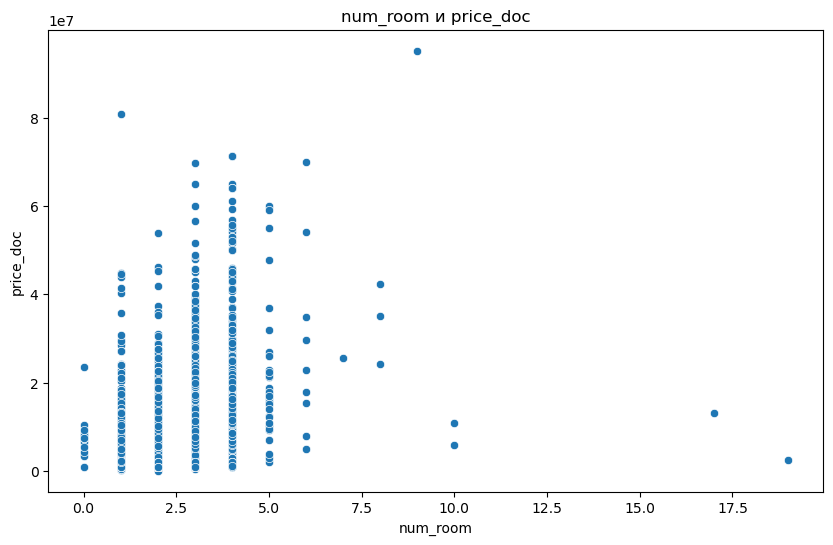

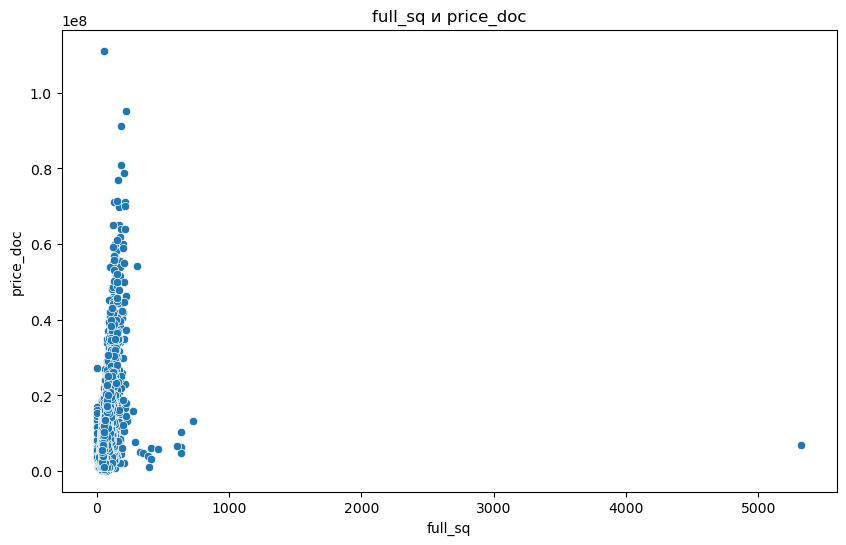

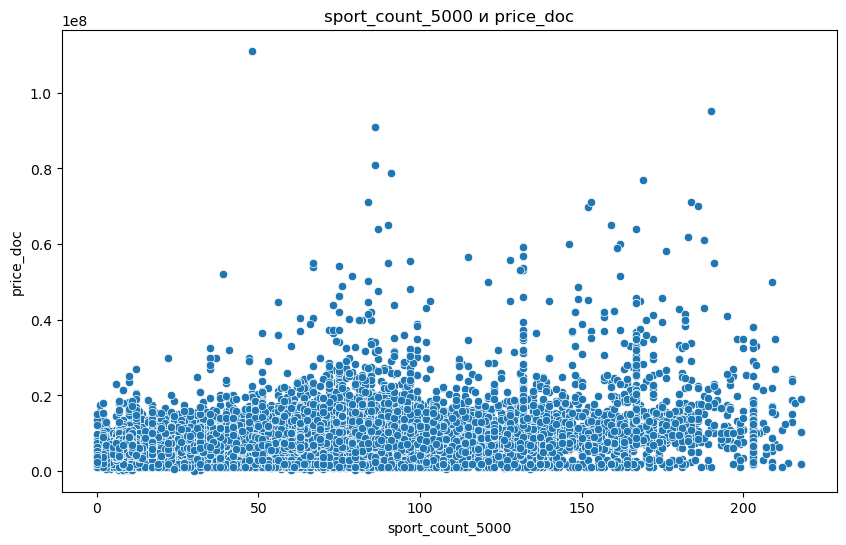

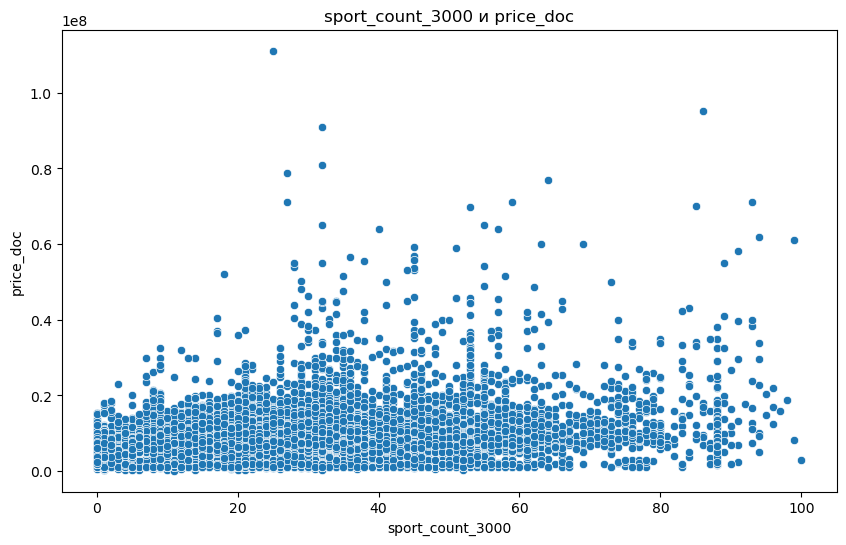

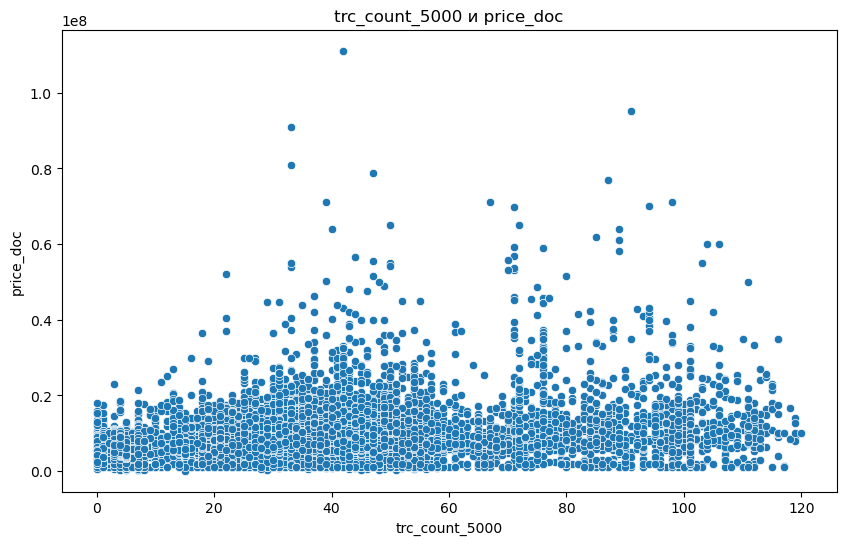

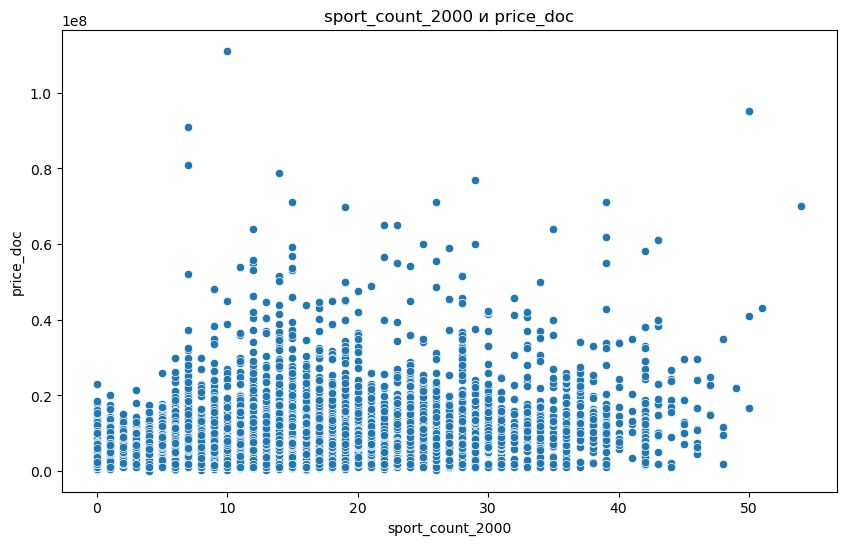

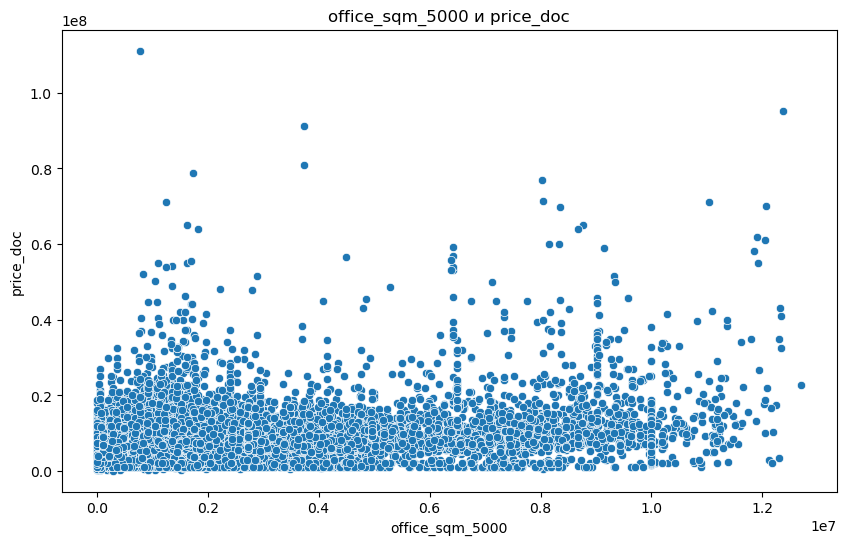

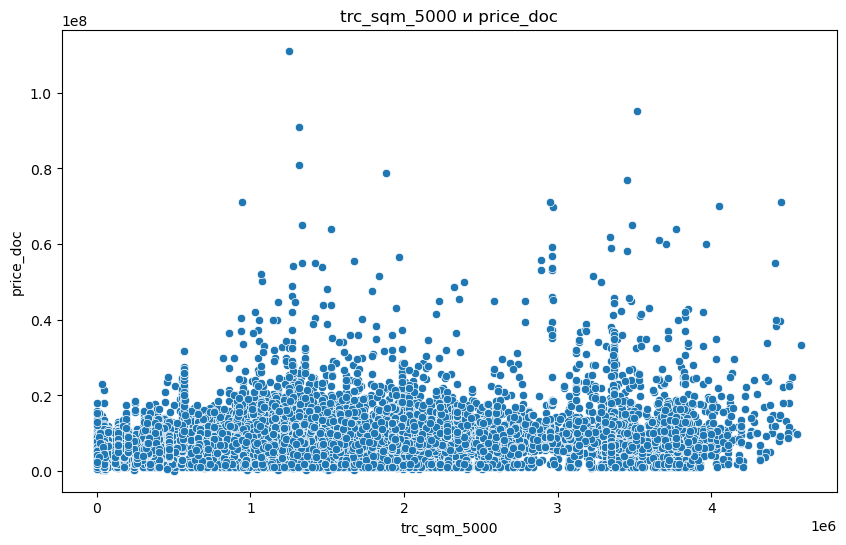

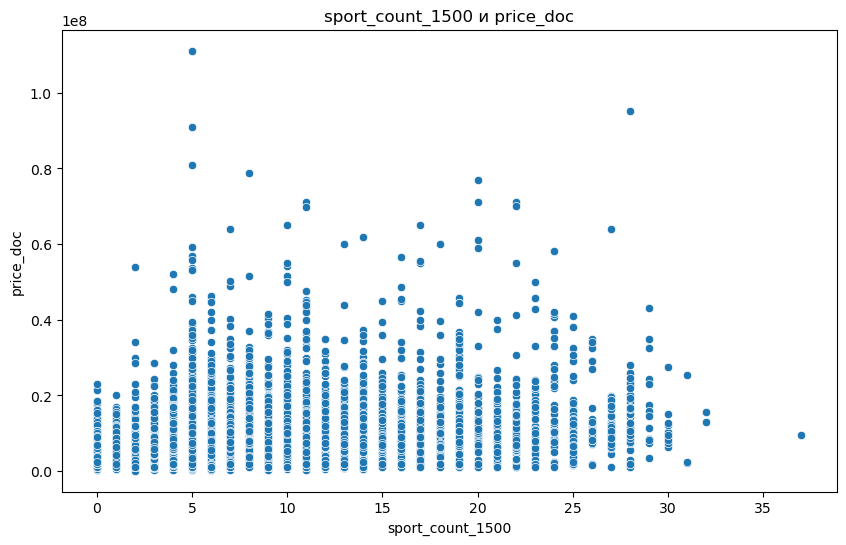

In [34]:
# Построим диаграммы рассеяния для выбранных характеристик
selected_features = top_correlated_features[1:]  # Исключим price_doc

for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=train, x=feature, y='price_doc')
    plt.title(f"{feature} и price_doc")
    plt.show()

In [35]:
# Cделаем модель 

In [36]:
# Загружаем данные
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [37]:
# Предварительная обработка
num_cols = train.drop(columns=['price_doc', 'id']).select_dtypes(include=['int64', 'float64']).columns
cat_cols = train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)])

In [38]:
# Выбор и обучение модели
X = train.drop(columns=['price_doc'])
y = train['price_doc']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Определим модель
xgb_params = {
	'objective': 'reg:squarederror',
	'eval_metric': 'rmse',
	'eta': 0.05,
	'max_depth': 5,
	'subsample': 0.8,
	'colsample_bytree': 0.7,
	"min_child_weight": 1,
	"gamma": 0,
	"alpha": 0,
	"nthread": 8
}

model = xgb.XGBRegressor(**xgb_params)

# Создаем Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

In [39]:
print("Количество значений NaN в price_doc:", train['price_doc'].isna().sum())

Количество значений NaN в price_doc: 0


In [40]:
train['price_doc'] = train['price_doc'].fillna(train['price_doc'].median())

In [41]:
# Более высокие значения R-квадрат указывают на лучшую производительность
# Обучим модель
pipeline.fit(X_train, y_train)

# Оценим модель
y_pred = pipeline.predict(X_val)
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print(f"RMSLE: {rmsle}")
print(f"R-squared: {r2}")

# Тестирование модели
X_test = test.drop(columns=['id'])
test_predictions = pipeline.predict(X_test)

RMSLE: 0.473207704751228
R-squared: 0.6938912769056509


In [42]:
# Попробуем также и другие модели для обучения
# Заменим определение модели XGBoost на определение модели LightGBM
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'n_jobs': -1
}
model = lgb.LGBMRegressor(**lgb_params)

In [43]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print(f"RMSLE: {rmsle}")
print(f"R-squared: {r2}")

X_test = test.drop(columns=['id'])
test_predictions = pipeline.predict(X_test)

RMSLE: 0.47152856741391297
R-squared: 0.7035321176262262


In [44]:
# Заменим определение модели LightGBM на определение модели CatBoost
catboost_params = {
    'iterations': 1000,
    'learning_rate': 0.05,
    'depth': 6,
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'random_seed': 42,
    'verbose': 100,
}
model = CatBoostRegressor(**catboost_params)

In [45]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print(f"RMSLE: {rmsle}")
print(f"R-squared: {r2}")

X_test = test.drop(columns=['id'])
test_predictions = pipeline.predict(X_test)

0:	learn: 4701529.8793952	total: 189ms	remaining: 3m 8s
100:	learn: 2614225.6048294	total: 2.81s	remaining: 25s
200:	learn: 2421480.1062965	total: 5.57s	remaining: 22.1s
300:	learn: 2300165.0692106	total: 8.16s	remaining: 18.9s
400:	learn: 2218189.6485294	total: 10.7s	remaining: 16s
500:	learn: 2159199.4720878	total: 13.3s	remaining: 13.3s
600:	learn: 2106135.5242793	total: 15.8s	remaining: 10.5s
700:	learn: 2062370.8312637	total: 18.2s	remaining: 7.78s
800:	learn: 2023930.4272583	total: 20.6s	remaining: 5.12s
900:	learn: 1989589.5942501	total: 23s	remaining: 2.53s
999:	learn: 1958333.7612019	total: 25.5s	remaining: 0us
RMSLE: 0.4669127574535293
R-squared: 0.7015265384459988


In [46]:
# Сохраним прогнозы
submission = pd.DataFrame({'id': test['id'], 'price_doc': test_predictions})
submission.to_csv("submission.csv", index=False)

Можно сделать вывод, что больше всего подходят модели LightGBM и CatBoost. Они показывают неплохой результат

In [47]:
# Выберем наименьшее возможное количество признаков, при котором
# качество модели будет сопоставимо с моделью с полным набором признаков
feature_importances = model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

# Топ 10 фичей
k = 10
top_k_features = X_train.columns[sorted_idx[:k]]
print("Топ", k, "признаков:")
for k in top_k_features:
  print(k)

Топ 10 признаков:
id
num_room
max_floor
cafe_count_1500_price_1000
market_count_3000
build_year
leisure_count_3000
life_sq
material
full_sq


### Пропуски, дубликаты

Данных много. В данных есть пропуски. В категориальных признаках пропусков нет.<br>
Пропуски в числовых заполню таким образом:<br>
- там где явно должен быть пропуск (вопрос предполагает только одинвариант ответа) заполню 0;
- в других случаях (количство этажей и т.д. методом, позволяющим сохранить рапсределение)


In [48]:
i=['floor','max_floor','material','build_year','num_room','kitch_sq','state']
df[i]=df[i].interpolate()

In [49]:
def omissions(data):
    for col in data.columns:
        if data[col].dtype == "object":
            data[col] = data[col].fillna('unknown')
            data[col] = data[col].astype("object")
        if data[col].dtype == "float64" or data[col].dtype == "int64":
            data[col] = data[col].fillna(0)

In [50]:
omissions(df)
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 292 columns):
 #    Column                                 Non-Null Count  Dtype  
---   ------                                 --------------  -----  
 0    id                                     30471 non-null  int64  
 1    timestamp                              30471 non-null  object 
 2    full_sq                                30471 non-null  int64  
 3    life_sq                                30471 non-null  float64
 4    floor                                  30471 non-null  float64
 5    max_floor                              30471 non-null  float64
 6    material                               30471 non-null  float64
 7    build_year                             30471 non-null  float64
 8    num_room                               30471 non-null  float64
 9    kitch_sq                               30471 non-null  float64
 10   state                                  30471 non-null  f

In [51]:
# Проверка дубликатов
df.duplicated().sum()


0

In [52]:
# Оценка статистики
df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_c

In [53]:
#Корреляция с ценой (зависимым признаком)
pd.set_option('display.max_rows', None) 
corr_data=df.corr().round(3)
corr_data['price_doc'].sort_values(ascending=False)

price_doc                                1.000
full_sq                                  0.342
num_room                                 0.331
sport_count_5000                         0.295
sport_count_3000                         0.291
trc_count_5000                           0.289
sport_count_2000                         0.278
office_sqm_5000                          0.270
trc_sqm_5000                             0.268
sport_count_1500                         0.258
sport_objects_raion                      0.253
trc_count_3000                           0.242
cafe_count_5000_price_1000               0.240
cafe_count_5000_price_1500               0.233
cafe_count_5000                          0.232
cafe_count_5000_na_price                 0.230
office_sqm_3000                          0.227
cafe_count_5000_price_500                0.227
cafe_count_5000_price_2500               0.226
trc_sqm_3000                             0.226
office_count_5000                        0.219
office_sqm_20

### Выбросы

Оценить возможное наличие выбросов можно из таблицы со статистикой и с помощью графика "ящик с усами". В первую очередь работаю с таблицей и посмотрю графически, то, что сразу вызвало вопросы (большая разница между максимальным значением и 75%, минимальным и 25%, а также средним и 50%)

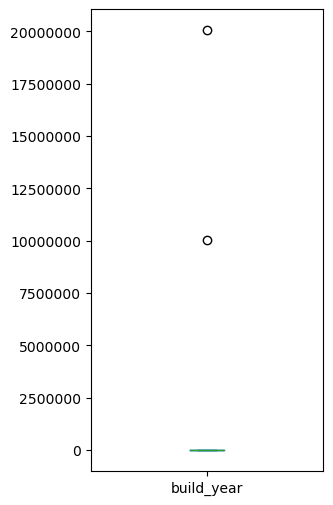

In [54]:
# дата постойки. из-за больших начений есть экспонентное значение. убираю
ax=df.build_year.plot(kind='box', figsize=(3,6))
ax.ticklabel_format(useOffset=False, style='plain', axis='y')

In [55]:
# Делаю срез, оставляя все здания, построенные с 1900 до 2028 (послений вариант допустим, потому что может быть продажа на этапе строителства). Остальное, сорее всего ошибки.
df=df.query('1900<build_year<2028')

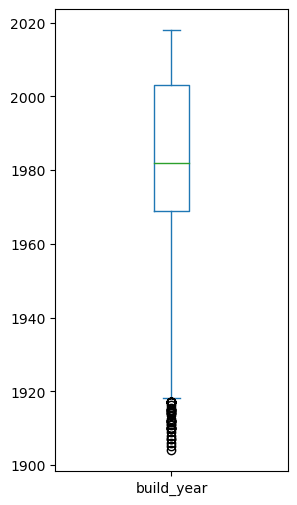

In [56]:
ax=df.build_year.plot(kind='box', figsize=(3,6))
ax.ticklabel_format(useOffset=False, style='plain', axis='y')

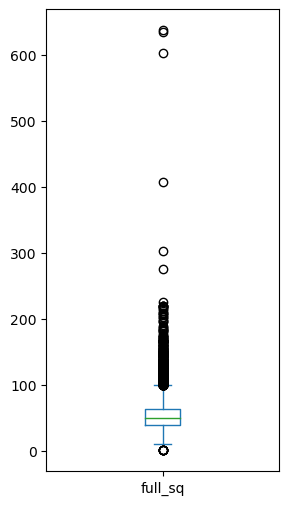

In [57]:
ax=df.full_sq.plot(kind='box', figsize=(3,6))
ax.ticklabel_format(useOffset=False, style='plain', axis='y')


In [58]:
# Оставлю площадь от 9 до 200 кв.м
df=df.query('9<full_sq<200')

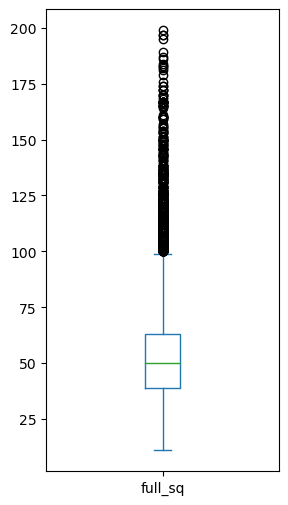

In [59]:
ax=df.full_sq.plot(kind='box', figsize=(3,6))
ax.ticklabel_format(useOffset=False, style='plain', axis='y')

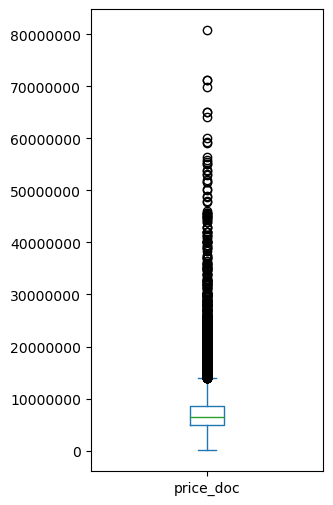

In [60]:
ax=df.price_doc.plot(kind='box', figsize=(3,6))
ax.ticklabel_format(useOffset=False, style='plain', axis='y')

In [61]:
#определение 10% и 90% квартилей, чтобы всё, что выходит за рамки убрать

q10 = df['price_doc'].quantile(0.1)
q90 = df['price_doc'].quantile(0.9)


df = df.query('price_doc >= @q10 and price_doc <= @q90')

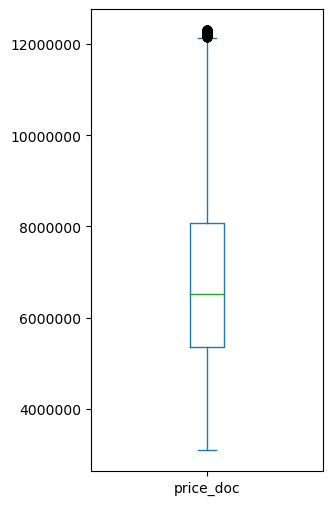

In [62]:
ax=df.price_doc.plot(kind='box', figsize=(3,6))
ax.ticklabel_format(useOffset=False, style='plain', axis='y')

In [63]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16820 entries, 8057 to 30470
Data columns (total 292 columns):
 #    Column                                 Non-Null Count  Dtype  
---   ------                                 --------------  -----  
 0    id                                     16820 non-null  int64  
 1    timestamp                              16820 non-null  object 
 2    full_sq                                16820 non-null  int64  
 3    life_sq                                16820 non-null  float64
 4    floor                                  16820 non-null  float64
 5    max_floor                              16820 non-null  float64
 6    material                               16820 non-null  float64
 7    build_year                             16820 non-null  float64
 8    num_room                               16820 non-null  float64
 9    kitch_sq                               16820 non-null  float64
 10   state                                  16820 non-null

## Оценка категориальных признаков

In [64]:
# Принудительно все категориальные признаки приведу к нижнему регистру, чтобы избежать неявных дубликатов
def lower(data):
    for col in data.columns:
        if data[col].dtype == "object":
            data[col] = data[col].str.lower()
            data[col] = data[col].astype("object")

lower(df)

In [65]:
df['thermal_power_plant_raion'].unique()

array(['no', 'yes'], dtype=object)

In [66]:
df['product_type'].unique()


array(['owneroccupier', 'investment'], dtype=object)

In [67]:
df['sub_area'].value_counts(dropna=False)

nekrasovka                        1115
poselenie sosenskoe                914
poselenie vnukovskoe               812
poselenie moskovskij               568
mitino                             388
tverskoe                           376
poselenie voskresenskoe            325
mar'ino                            318
krjukovo                           293
juzhnoe butovo                     287
poselenie shherbinka               264
poselenie desjonovskoe             260
zapadnoe degunino                  245
solncevo                           242
nagatinskij zaton                  220
otradnoe                           212
tekstil'shhiki                     193
ljublino                           183
poselenie filimonkovskoe           179
bogorodskoe                        178
birjulevo vostochnoe               176
gol'janovo                         175
vyhino-zhulebino                   169
chertanovo juzhnoe                 160
nagornoe                           155
bibirevo                 

## Удаление признаков

In [68]:
# Дату преобразуем во время и выделим год и месяц 
df['year']=pd.DatetimeIndex(df['timestamp']).year
df['month']=pd.DatetimeIndex(df['timestamp']).month

#Удаляю признаки, которые однозначно не понадобятся для работы модели: номер записи - он не влияет на цену;
                                                                      #время записи - модель не работает с датой,                                                                    
df=df.drop(['id','timestamp' ], axis=1)
df.head(3)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_pr

## Кодирование категориальных признаков

In [69]:
# Привожу категориальные признаки к одному типу, чтобы кодировать
categorical_features=['product_type', 'sub_area', 'culture_objects_top_25', 'thermal_power_plant_raion',
              'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
              'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line',
              'big_road1_1line', 'railroad_1line','ecology']

for e in categorical_features:
    df[e]=df[e].astype(str)



In [70]:
# Линейная модель не работает с категориальными принками, поэтому их кодирую с помощью OrdinalEncoder (тренировочная выборка)
data_encoder=df.copy()

encoder = OrdinalEncoder()
data_encoder[['product_type', 'sub_area', 'culture_objects_top_25', 'thermal_power_plant_raion',
              'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
              'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line',
              'big_road1_1line', 'railroad_1line',
              'ecology', ]]=encoder.fit_transform(df[['product_type', 'sub_area','culture_objects_top_25',
                                                      'thermal_power_plant_raion','incineration_raion',
                                                      'oil_chemistry_raion','radiation_raion', 'railroad_terminal_raion',
                                                      'big_market_raion', 'nuclear_reactor_raion',
                                                      'detention_facility_raion', 'water_1line','big_road1_1line',
                                                      'railroad_1line', 'ecology']])
data_encoder.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_pr

In [71]:
#Переименую столбец цены
data_encoder= data_encoder.rename(columns={'price_doc': 'price'})

## Разделение выборок

In [72]:
#Разделение выборок на тестовую и обучающую
train, test = train_test_split(data_encoder,train_size=0.80,random_state=12345)

In [73]:
# Выделяю целевой признак для обучения модели
x_train=train.drop('price', axis=1)
y_train=train['price']
x_test=test.drop('price', axis=1)
y_test=test['price']

In [74]:
# Определяю и обучаю модель
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [75]:
# Предсказание и оценка модели на тестовой выборке
p=model.predict(x_test)

In [76]:

def rmsle(predicted, actual):
    """
    Рассчитывает значение RMSLE (root mean squared logarithmic error) между
    предсказанными и фактическими значениями.
    
    :param predicted: массив или список с предсказанными значениями
    :param actual: массив или список с фактическими значениями
    :return: RMSLE между predicted и actual
    """
    predicted = np.array(predicted)
    actual = np.array(actual)
    return np.sqrt(np.mean((np.log(1 + predicted) - np.log(1 + actual))**2))
#Оценка
score = rmsle(p, y_test)
print("RMSLE:", score)

RMSLE: 0.17511233472744497


In [77]:
r2 = r2_score(y_test, p)
display('R2', r2)

'R2'

0.6584618996167357

In [78]:
# Сохранение модели в файл для dash
joblib.dump(model, 'model.pkl')

['model.pkl']

## Выбор количества признаков

In [79]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

# Создаем модель для оценки важности признаков
estimator = LinearRegression()

# Выбираем метод исключения признаков
selector = SelectFromModel(estimator, threshold='median')

# Применяем метод к данным
selector.fit(x_train, y_train)

# Выбираем наименьшее возможное количество признаков
x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

# Обучаем модель на выбранных признаках
estimator.fit(x_train_selected, y_train)
score = estimator.score(x_test_selected, y_test)
print("Качество модели с выбранными признаками: {:.2f}".format(score))
score1 = rmsle(estimator.predict(x_test_selected), y_test)
print("RMSLE:", score1)

Качество модели с выбранными признаками: 0.64
RMSLE: 0.17857764379468163


In [80]:
# Получаем булевский массив, указывающий, какие признаки были выбраны
feature_mask = selector.get_support()

# Создаем список выбранных признаков
selected_features = x_train.columns[feature_mask]

# Выводим список выбранных признаков
print(selected_features)


Index(['full_sq', 'floor', 'material', 'num_room', 'state', 'product_type',
       'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool',
       ...
       'market_count_3000', 'prom_part_5000', 'cafe_sum_5000_min_price_avg',
       'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000',
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_high',
       'mosque_count_5000', 'year', 'month'],
      dtype='object', length=146)


## Приложение

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import joblib
import pandas as pd
# Загрузка модели для предсказания цен квартир
model = joblib.load('model.pkl')

html.Label('Цена'),
dcc.Input(id='price', type='number', value='1000000'),

# Описание интерфейса веб-приложения
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1('Предсказание цены квартиры'),
    html.Label('Общая площадь'),
    dcc.Input(id='total_area', type='number', value='50'),
    html.Label('Количество комнат'),
    dcc.Input(id='rooms', type='number', value='2'),
    html.Label('Этаж'),
    dcc.Input(id='floor', type='number', value='3'),
    html.Label('Расстояние до центра'),
    dcc.Input(id='city_center_distance', type='number', value='10'),
    html.Button('Предсказать', id='submit'),
    html.Div(id='output')
])

# Реализация функции предсказания цены квартиры
def predict_price(total_area, rooms, floor, city_center_distance, price):
           
    # Отфильтровать данные по цене
    data = data[data['price'] <= price]
    
    # Сформировать входные данные для модели
    X = pd.DataFrame([[total_area, rooms, floor, city_center_distance]], columns=['total_area', 'rooms', 'floor', 'city_center_distance'])
    
    # Выполнить предсказание цены для всех районов
    prices = model.predict(X)

    # Найти район с наиболее близкой ценой к введенной пользователем
    closest_price_idx = (np.abs(prices - price)).argmin()
    
    # Получить название района с наиболее близкой ценой
    district = data.iloc[closest_price_idx]['district']
    
    return district


# Интеграция функции предсказания в интерфейс веб-приложения
@app.callback(
    Output(component_id='output', component_property='children'),
    [Input('submit', 'n_clicks')],
    [State('total_area', 'value'),
     State('rooms', 'value'),
     State('floor', 'value'),
     State('city_center_distance', 'value'),
     State('price', 'value')])
def update_output(n_clicks, total_area, rooms, floor, city_center_distance, price):
    district = predict_price(total_area, rooms, floor, city_center_distance, price)
    return f'Район, подходящий для данной цены: {district}'

def update_output(n_clicks, total_area, rooms, floor, city_center_distance):
    price = predict_price(total_area, rooms, floor, city_center_distance)
    return f'Предсказанная цена квартиры: {price}'

if __name__ == '__main__':
    app.run_server(debug=False, port=8051)


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import plotly.graph_objs as go
import pandas as pd

# Загрузка модели для предсказания цен квартир
model = joblib.load('model.pkl')

# Описание интерфейса веб-приложения
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1('Предсказание цены квартиры'),
    dcc.Graph(
        id='map',
        figure=go.Figure(
            go.Scattermapbox(
                lat=[55.751244], # широта
                lon=[37.618423], # долгота
                mode='markers',
                marker=go.scattermapbox.Marker(
                    size=14
                ),
                text=['Выберите местоположение квартиры'],
                hoverinfo='text'
            ),
            layout=go.Layout(
                autosize=True,
                hovermode='closest',
                mapbox=dict(
                    accesstoken='your-mapbox-access-token',
                    center=dict(
                        lat=55.751244,
                        lon=37.618423
                    ),
                    zoom=10
                ),
            )
        )
    ),
    html.Label('Общая площадь'),
    dcc.Input(id='total_area', type='number', value='50'),
    html.Label('Количество комнат'),
    dcc.Input(id='rooms', type='number', value='2'),
    html.Label('Этаж'),
    dcc.Input(id='floor', type='number', value='3'),
    html.Label('Расстояние до центра'),
    dcc.Input(id='city_center_distance', type='number', value='10'),
    html.Button('Предсказать', id='submit'),
    html.Div(id='output')
])

# Реализация функции предсказания цены квартиры
def predict_price(total_area, rooms, floor, city_center_distance, lat, lon):
    X = pd.DataFrame([[total_area, rooms, floor, city_center_distance, lat, lon]], columns=['total_area', 'rooms', 'floor', 'city_center_distance', 'lat', 'lon'])
    price = model.predict(X)[0]
    return round(price)

# Интеграция функции предсказания в интерфейс веб-приложения
@app.callback(
    Output(component_id='output', component_property='children'),
    [Input('submit', 'n_clicks')],
    [State('total_area', 'value'),
     State('rooms', 'value'),
     State('floor', 'value'),
     State('city_center_distance', 'value'),
     State('map', 'hoverData')])
def update_output(n_clicks, total_area, rooms, floor, city_center_distance, hoverData):
    lat = hoverData['points'][0]['lat']
    lon = hoverData['points'][0]['lon']
    price = predict_price(total_area, rooms, floor, city_center_distance, lat, lon)
    return f'Предполагаемая цена квартиры: {price}'

if __name__ == '__main__':
    app.run_server(debug=False, port=8050)
